In this notebook, I have processed the temperature data for Gandhinagar Region in Gujarat. The copernicus website gives a starighforward option to either download the data from their website or use their API to download the data. Download any data from [Climate Data Source](https://cds.climate.copernicus.eu/#!/home). Both of them works and takes approximately the same time. I have used the following requirement while using the API.

Requirement (Windows with Anaconda VIrtual Environment)  
- Create an account [here](https://cds.climate.copernicus.eu)
- Install cdsapi via conda forge
- Install netCDF4 via conda forge 
- Go to the directory: C://Users//Username and create a file name <i>.cdsapirc</i>
- Copy the URL and Key [form here](https://cds.climate.copernicus.eu/api-how-to) and paste to the file created above: 

In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '2m_dewpoint_temperature', '2m_temperature', 'total_precipitation',
        ],
        'year': [
            '2018', '2019',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'format': 'netcdf',
    },
    'temperature.nc')


"\nimport cdsapi\n\nc = cdsapi.Client()\n\nc.retrieve(\n    'reanalysis-era5-single-levels',\n    {\n        'product_type': 'reanalysis',\n        'variable': [\n            '2m_dewpoint_temperature', '2m_temperature', 'total_precipitation',\n        ],\n        'year': [\n            '2018', '2019',\n        ],\n        'month': [\n            '01', '02', '03',\n            '04', '05', '06',\n            '07', '08', '09',\n            '10', '11', '12',\n        ],\n        'day': [\n            '01', '02', '03',\n            '04', '05', '06',\n            '07', '08', '09',\n            '10', '11', '12',\n            '13', '14', '15',\n            '16', '17', '18',\n            '19', '20', '21',\n            '22', '23', '24',\n            '25', '26', '27',\n            '28', '29', '30',\n            '31',\n        ],\n        'time': [\n            '00:00', '01:00', '02:00',\n            '03:00', '04:00', '05:00',\n            '06:00', '07:00', '08:00',\n            '09:00', '10:00', 

 Open the file consiting the data. I downloaded the file from ERA5 website in NetCDF format. I choose <u>2m temerature</u> for the month of June 2019 to November 2019. Use xarray and pandas to open and convert the data to pandas dataframe and save it as CSV

In [1]:
import xarray as xr
import pandas as pd

In [67]:
ds = xr.open_dataset('D:/temperature.nc')


In [68]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 2929)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-06-01 ... 2019-10-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-12-30 07:17:58 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

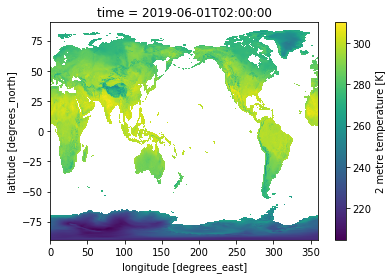

In [44]:
ds.t2m[2].plot()

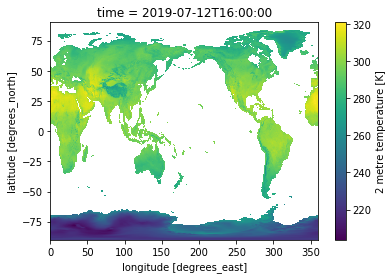

In [46]:
ds.t2m[1000].plot()

The index in t2m is the 3rd dimention which is time. Below is choice of lat-long for Gandhinagar, Gujarat. This will filter the huge xrray in these coordinate values

In [63]:
newds=ds.sel(longitude=72.63, latitude=23.21, method='nearest')

In [77]:
#Convert to pandas dataframe and save it
df = newds.to_dataframe()
#convert kelvin to celcius
df['t2m']=df['t2m']-273.15
#save the dataframe for future use
x = df.to_csv('temperature-gandhinagar.csv')